# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import datetime
import math

# Load data file

In [2]:
file_name = "vasopressIn_dataset.xlsx" # within same folder as notebook file
pre_sheet_name = 'Pre Restriction'
post_sheet_name = 'Post Restriction'

# Read file into a pandas DataFrame
df_pre = pd.read_excel(file_name, sheet_name = pre_sheet_name) # pre restriction dataframe
df_post = pd.read_excel(file_name, sheet_name = post_sheet_name) # post restriction dataframe

# Cleaning Dataset

## Cleaning goals:
* drop all empty columns and rows
* drop empty columns for rate pressor, vasopressIN columns
* Change data types to correct type for analysis later
* standardize time/date formats
* Remember, if time difference value is negative, drop value from dataset
* Clean time values: if value is less than 4 digits, add leading zeroes until it is 4 digits

In [3]:
# Drop empty columns to clean up df
#df = df.reset_index().dropna(axis = 1, how = 'all'
df_pre = df_pre.reset_index().dropna(axis = 1, how = 'all')
df_post = df_post.reset_index().dropna(axis = 1, how = 'all')

In [4]:
# Check number of rows
print(len(df_pre))
print(len(df_post))

53
37


In [5]:
# Drop empty rows
df_pre = df_pre.dropna(axis = 0, how = 'all')
df_post = df_post.dropna(axis = 0, how = 'all')

In [6]:
# Check if any rows were dropped
print(len(df_pre))
print(len(df_post))

51
37


In [7]:
df_pre.head(n=5)

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
0,65,M,109.2,1.0,NE,12,22.5,0.04,2017-02-24 00:00:00,1004,NaT,NaN,02/26/2017,2017-02-26 08:16:00.000
1,83,F,55.3,1.0,NE,12,NaN,0.04,2017-02-27 00:00:00,1138,2017-02-28,1349.0,02/28/2017,2017-02-28 05:45:00.000
2,53,F,111.7,1.0,NE,3,5.6,0.04,2017-02-28 00:00:00,545,2017-03-02,900.0,03/02/2017,2017-03-02 14:34:00.000
3,61,M,75.2,1.0,NE,8,15.0,0.04,2017-03-12 00:00:00,1100,2017-03-17,1500.0,03/17/2017,2017-03-17 13:42:59.999
4,84,F,90,1.0,PE,180,67.5,0.04,2017-03-16 00:00:00,1514,2017-03-19,700.0,03/20/2017,2017-03-20 02:29:59.999


In [8]:
df_post.head(n=5)

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor mcg/min,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
0,64.0,M,82.0,1.0,NE,30.0,56.3,0.04,2018-09-03,33.0,NaT,NaN,09/04/2018,2018-09-04 09:14:00.000
1,NaN,NaN,NaN,1.0,NE,19.0,35.6,0.04,2018-09-04,2217.0,2018-09-04,1300.0,09/07/2018,2018-09-07 10:42:59.999
2,91.0,F,74.0,0.0,NE,10.0,18.8,0.04,2018-09-08,1156.0,2018-09-09,800.0,09/09/2018,2018-09-09 08:25:00.000
3,43.0,M,79.3,1.0,NE,30.0,56.3,0.04,2018-09-08,1049.0,2018-09-11,1600.0,09/10/2018,2018-09-10 18:59:59.999
4,43.0,M,79.3,1.0,NE,10.0,4.7,0.04,2018-09-11,303.0,2018-09-11,1600.0,09/13/2018,2018-09-13 09:50:59.999


In [9]:
df_pre.dtypes # check datatypes of both dataframes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time              float64
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [10]:
df_post.dtypes

Age                                float64
Sex                                 object
TBW (kg)                           float64
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor mcg/min               float64
Rate Pressor                       float64
VasopressIN Dose (U/min)           float64
VasopressIN Date            datetime64[ns]
VasopressIN Admin Time             float64
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time              float64
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [11]:
# Change column data type to float
df_pre['Rate Pressor'] = df_pre['Rate Pressor'].astype(float, errors = 'ignore')

In [12]:
# Change column data type to float
df_post['Rate Pressor'] = df_post['Rate Pressor'].astype(float, errors = 'ignore')

In [13]:
# Assign new dataframes for dropped rows with no time values
prevas_df = df_pre.dropna(subset = ['Vasopressin Stop Time', 'Discontinue Time'], how = 'any')
postvas_df = df_post.dropna(subset = ['Vasopressin Stop Time', 'Discontinue Time'], how = 'any')

In [14]:
prevas_df['Vasopressin Stop Time']

1     1349.0
2      900.0
3     1500.0
4      700.0
7     1900.0
8      900.0
10    1255.0
12    1000.0
13    1100.0
14    2200.0
15    1500.0
16     900.0
17    2000.0
18    1800.0
19     825.0
20    1815.0
21    1500.0
22    1600.0
23     400.0
25    1000.0
26    1000.0
28    1800.0
29    2300.0
31    1400.0
32     100.0
34    1300.0
35       0.0
36    2100.0
38    1215.0
42     700.0
Name: Vasopressin Stop Time, dtype: float64

In [15]:
# Check number of rows in each dataframe
print(len(prevas_df))
print(len(postvas_df))

30
33


## Next steps for sorting:
* parse 4 digit time values
* combine the start and stop dates
* subtract with datetime and put into a new series

In [16]:
# first convert admin and stop times to strings instead of floats
prevas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']] = \
prevas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']].astype(int).astype(str)
postvas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']] = \
postvas_df[['VasopressIN Admin Time', 'Vasopressin Stop Time']].astype(int).astype(str)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Psuedocode

1. check if string is within 1 to 4 characters
2. count how many is missing from 4
3. reassign value to have missing zeroes + number

In [17]:
# Change time in and out data points so they are all 4 digits each
# Do this by adding leading zeroes until they are 4 digits
def add_zeroes(string):
    try:
        string = str(string)
    except:
        pass
    
    if string == 'NaN':
        print('No value')
        #return None # return none for NaN value
    elif len(string) == 4:
        return string # return string if it's already long enough
    elif (len(string) >= 1) and (len(string) < 4): # check if between 1 and 4 characters
        count = len(string)
        #print(count)
        diff = 4 - count # find out how many zeroes to add
        #print(diff)
        string = str('0' * diff + string) # add the leading zeroes to have a 4 digit time
        return string
    else:
        #print('Unknown value')
        return None # return none if it's anything else

In [18]:
# Define function to do convert on time columns
def parse_time(string):
    hour = string[:-2]
    minute = string[-2:]
    result = hour + ':' + minute
    return datetime.datetime.strptime(result, '%H:%M').time()

In [19]:
def assign_values(df):
    for i in range(len(df)):
        df.iloc[i] = parse_time(df.iloc[i])
    return df

In [20]:
# Apply function to change time rows to 4 character strings
prevas_df['Vasopressin Stop Time'] = prevas_df['Vasopressin Stop Time'].apply(add_zeroes)
postvas_df['Vasopressin Stop Time'] = postvas_df['Vasopressin Stop Time'].apply(add_zeroes)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
col_list = ['VasopressIN Admin Time', 'Vasopressin Stop Time']

In [22]:
for col in col_list:
    prevas_df[col] = prevas_df[col].apply(add_zeroes)
    postvas_df[col] = postvas_df[col].apply(add_zeroes)
    prevas_df[col] = prevas_df[col].apply(parse_time)
    postvas_df[col] = postvas_df[col].apply(parse_time)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

### Add new column with datetime for datetime operations
* New column named Vasopressin Stop
* Combine stop date with stop time
* Change datatype to datetime
* Add new column for difference between stop time and discontinue time
* Name new column ???

In [23]:
prevas_df.dtypes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [24]:
postvas_df.dtypes

Age                                float64
Sex                                 object
TBW (kg)                           float64
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor mcg/min               float64
Rate Pressor                       float64
VasopressIN Dose (U/min)           float64
VasopressIN Date            datetime64[ns]
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time               object
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [25]:
# Drop columns where discontinue time is an empty valuedd

In [26]:
def calc_diff(df):
    df['Vasopressin Stop Date'] = df['Vasopressin Stop Date'].astype(str)
    df['Vasopressin Stop Time'] = df['Vasopressin Stop Time'].astype(str)
    df['Vasopressin Stop'] = df['Vasopressin Stop Date'] + ' ' + df['Vasopressin Stop Time']
    df['Vasopressin Stop'] = pd.to_datetime(df['Vasopressin Stop'])
    df['Difference'] = df['Discontinue Time'] - df['Vasopressin Stop']
    df['Difference'] = df['Difference'].apply(lambda time_diff: (int(time_diff.total_seconds()/60)))
    return df

In [27]:
prevas_df['Vasopressin Stop Date'] = prevas_df['Vasopressin Stop Date'].astype(str)
prevas_df['Vasopressin Stop Time'] = prevas_df['Vasopressin Stop Time'].astype(str)
prevas_df['Vasopressin Stop'] = prevas_df['Vasopressin Stop Date'] + ' ' + prevas_df['Vasopressin Stop Time']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [28]:
prevas_df['Vasopressin Stop'] = pd.to_datetime(prevas_df['Vasopressin Stop'])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
prevas_df['Difference'] = prevas_df['Discontinue Time'] - prevas_df['Vasopressin Stop']
prevas_df['Difference'] = prevas_df['Difference'].apply(lambda time_diff: (int(time_diff.total_seconds()/60)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
prevas_df['Difference']

1     -484
2      334
3      -77
4     1169
7       58
8      219
10   -1217
12    2195
13    -155
14    1471
15      14
16     -42
17    2963
18     -88
19      18
20      -4
21       5
22      40
23   -1095
25   -1042
26     390
28     -81
29      20
31       9
32     -77
34     -28
35     557
36    -920
38      -7
42     231
Name: Difference, dtype: int64

In [31]:
postvas_df = calc_diff(postvas_df)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [32]:
postvas_df['Difference']

1     4182
2       25
3    -1260
4     2510
5       36
6      180
7     1285
8      314
9      -35
10     -71
12     -55
13    1900
14     360
15     190
16       7
17     393
18     350
19    1057
20      40
21      47
22      45
24    1451
25      81
26      44
27    -599
28      64
29    1764
30      54
31      61
32     214
33   -1741
35      34
36       5
Name: Difference, dtype: int64

In [33]:
postvas_df['Difference'].mean()

391.8787878787879

# Plots and Analysis

* box plot for repressor rates, post and pre
* histogram too
* quartile and stats values for pre and post

In [34]:
# Print values for rate pressor pre intervention
df_pre['Rate Pressor'].describe()

count     41.000000
mean      65.724390
std       51.479602
min        0.000000
25%       37.500000
50%       56.300000
75%       93.300000
max      281.000000
Name: Rate Pressor, dtype: float64

In [35]:
# print values for rate pressor post intervention
df_post['Rate Pressor'].describe()

count     32.000000
mean      43.838750
std       30.542405
min        1.900000
25%       18.800000
50%       39.400000
75%       56.300000
max      103.000000
Name: Rate Pressor, dtype: float64

In [36]:
# Pre intervention quartile time differences
prevas_df['Difference'].describe()

count      30.000000
mean      145.866667
std       872.373604
min     -1217.000000
25%       -80.000000
50%         7.000000
75%       228.000000
max      2963.000000
Name: Difference, dtype: float64

In [37]:
# Post intervention quartile time differences
postvas_df['Difference'].describe()

count      33.000000
mean      391.878788
std      1059.944685
min     -1741.000000
25%        25.000000
50%        61.000000
75%       360.000000
max      4182.000000
Name: Difference, dtype: float64

In [38]:
# declare x variable for following plots
x_pre = df_pre['Rate Pressor']
x_post = df_post['Rate Pressor']

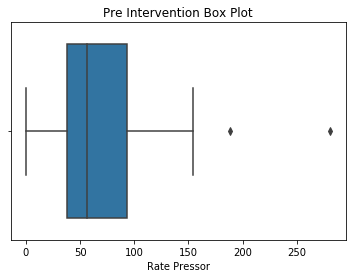

In [39]:
# box plot for pre

pre_box = sns.boxplot(x=x_pre).set_title('Pre Intervention Box Plot')
#pre_box.savefig('pre_restriction_box.png')
plt.savefig('pre_restriction_box.png')

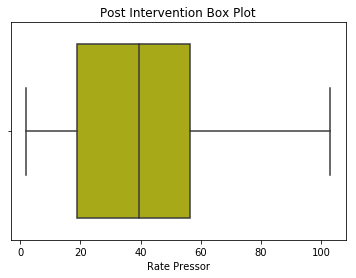

In [40]:
# box plot for post
pos_box = sns.boxplot(x=x_post, color = '#bec101').set_title('Post Intervention Box Plot')
plt.savefig('post_restriction_box.png')

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


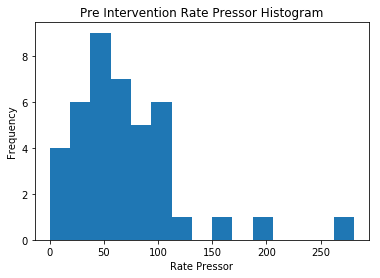

In [41]:
# histogram pre
fig1 = plt.hist(x_pre, bins = 15)
plt.title('Pre Intervention Rate Pressor Histogram')
plt.xlabel('Rate Pressor')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = [15, 8]
plt.savefig('pre_restriction_histogram.png')

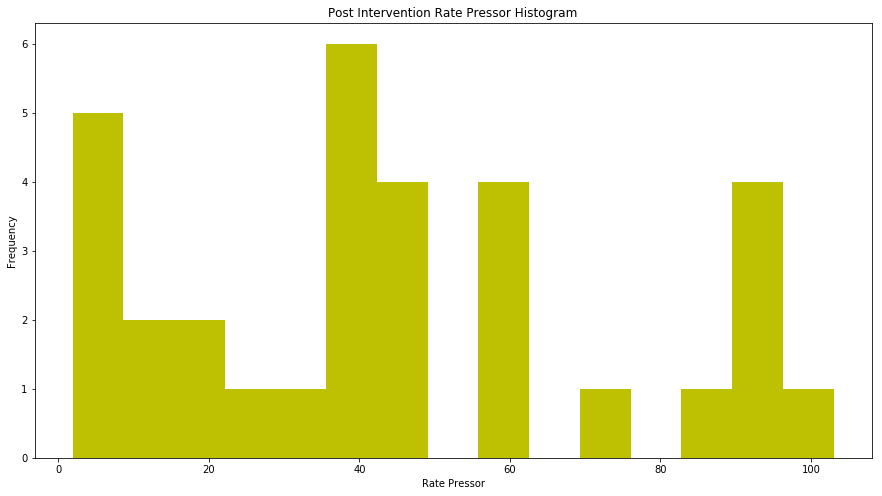

In [42]:
# histogram post
plt.hist(x_post, bins = 15, color = '#bec101')
plt.title('Post Intervention Rate Pressor Histogram')
plt.xlabel('Rate Pressor')
plt.ylabel('Frequency')
plt.savefig('post_restriction_histogram.png')

In [43]:
# time differences variables
x_prediff = prevas_df['Difference']
x_postdiff = postvas_df['Difference']

Text(0, 0.5, 'Frequency')

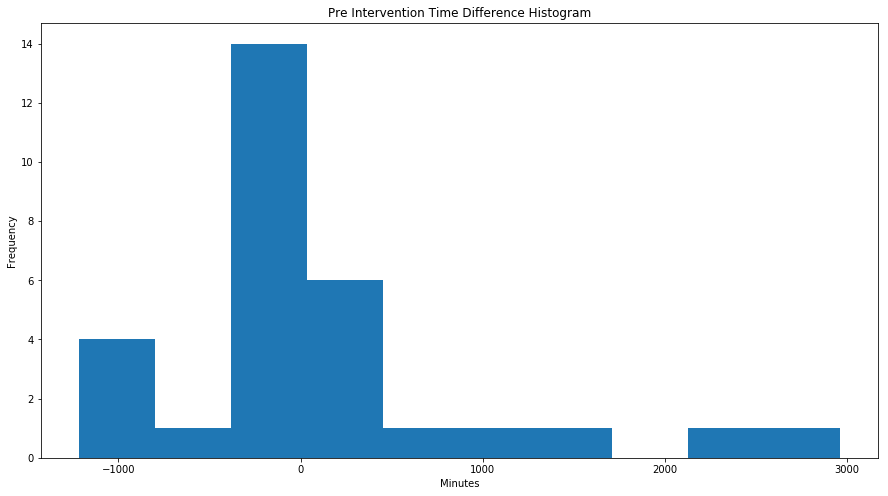

In [46]:
# histogram of pre restriction time difference

plt.hist(x_prediff)
plt.title('Pre Intervention Time Difference Histogram')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
#plt.savefig('predifference_histogram.png')

Text(0, 0.5, 'Frequency')

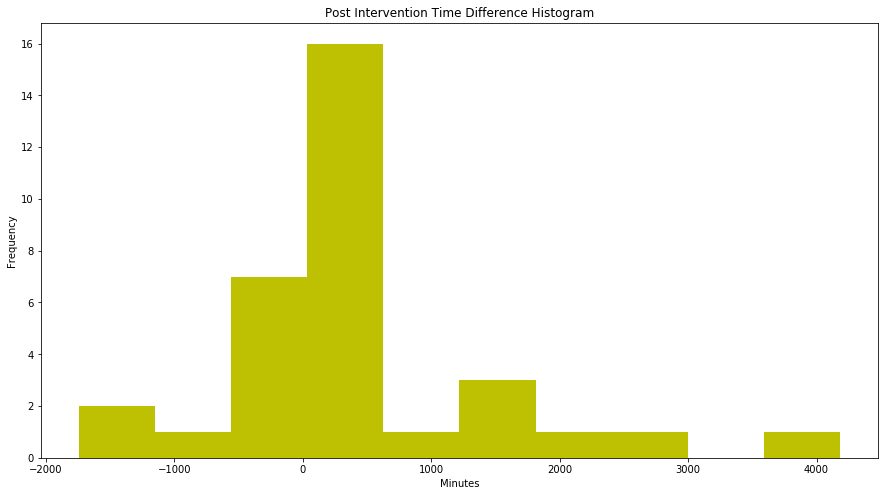

In [45]:
# histogram of post restriction time difference

plt.hist(x_postdiff, color = '#bec101')
plt.title('Post Intervention Time Difference Histogram')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
#plt.savefig('postdifference_histogram.png')